In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

### Create Dataset

In [28]:
# Initializing Seed for consistent results everytime
np.random.seed(42)
pts = 50

# Create a dataset of 50 points
x_vals = np.random.rand(50)
x_train = np.asarray(x_vals,dtype=np.float32).reshape(-1,1)
m = 1
alpha = np.random.rand(1)
beta = np.random.rand(1)
y_correct = np.asarray([2*i+m for i in x_vals], dtype=np.float32).reshape(-1,1)

### Using Pytorch
1. PyTorch Models
2. Create a Class
3. Declare your Forward Pass
4. Tune the HyperParameters

In [33]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        # initialize our superclass 
        super(LinearRegressionModel, self).__init__() 
        # nn.linear is defined in nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

### Steps
1. Create instance of model
2. Select Loss Criterion
3. Choose Hyper Parameters

In [35]:
# create a linear model
model = LinearRegressionModel(input_dim, output_dim)

# use Mean Squared Error for the loss
criterion = nn.MSELoss() # Mean Squared Loss

# create an optimizer object using Stochastic Gradient Descent
l_rate = 0.01 
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

epochs = 2000

### Train the Model
Using 200 **epochs**; an epoch is one complete presentation of the data set to be learned to a learning machine. Learning machines like feedforward neural nets that use iterative algorithms often need many epochs during their learning phase.

During each epoch, we'll pass each instance in the dataset through the network exactly 1 time. We will then estimate the loss, which indicates the magnitude of difference between the model outputs (Y_hat) and the true values (Y). We then compute the *gradient* of the loss function; this tells us how much the loss function would change with corresponding changes in the model parameters. With this gradient in hand, we then **update the parameters** using our learning rate. 

In [36]:
for epoch in range(epochs):

    epoch +=1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    # compute the gradient
    loss.backward()
    optimiser.step()# update the parameters
    
    if epoch%100 is 0:
        print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 100, loss 0.18185999989509583
epoch 200, loss 0.10518866032361984
epoch 300, loss 0.08006535470485687
epoch 400, loss 0.06112908571958542
epoch 500, loss 0.04667278751730919
epoch 600, loss 0.035635240375995636
epoch 700, loss 0.027207907289266586
epoch 800, loss 0.020773552358150482
epoch 900, loss 0.015860838815569878
epoch 1000, loss 0.012109964154660702
epoch 1100, loss 0.009246110916137695
epoch 1200, loss 0.007059527561068535
epoch 1300, loss 0.005390052683651447
epoch 1400, loss 0.0041153645142912865
epoch 1500, loss 0.0031421221792697906
epoch 1600, loss 0.0023990515619516373
epoch 1700, loss 0.0018317059148102999
epoch 1800, loss 0.001398505992256105
epoch 1900, loss 0.0010677715763449669
epoch 2000, loss 0.0008152537047863007


### Printing the predictions
We can pass more data through the model (now that it has been trained over 2000 epochs) and get predictions. 

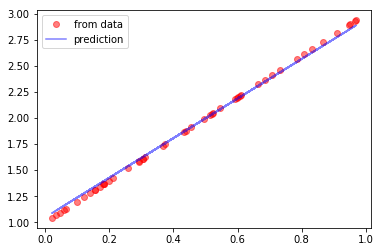

OrderedDict([('linear.weight', tensor([[1.9009]])), ('linear.bias', tensor([1.0474]))])


In [46]:
predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5, color = 'red')
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5, color = 'blue')
plt.legend()
plt.show()
print(model.state_dict())